### Induwara Senadheera 
### 190574U

In [17]:
# Question 1
import numpy as np
from plyfile import PlyData, PlyElement
import matplotlib.pyplot as plt 

pcd = PlyData.read(r'./Images/airplane.ply')
assert pcd is not None

points = np.concatenate((pcd['vertex']['x'].reshape(1,-1), pcd['vertex']['y'].reshape(1,-1), pcd['vertex']['z'].reshape(1,-1)), axis=0)
points = points - np.mean(points, axis =1).reshape(3,1)

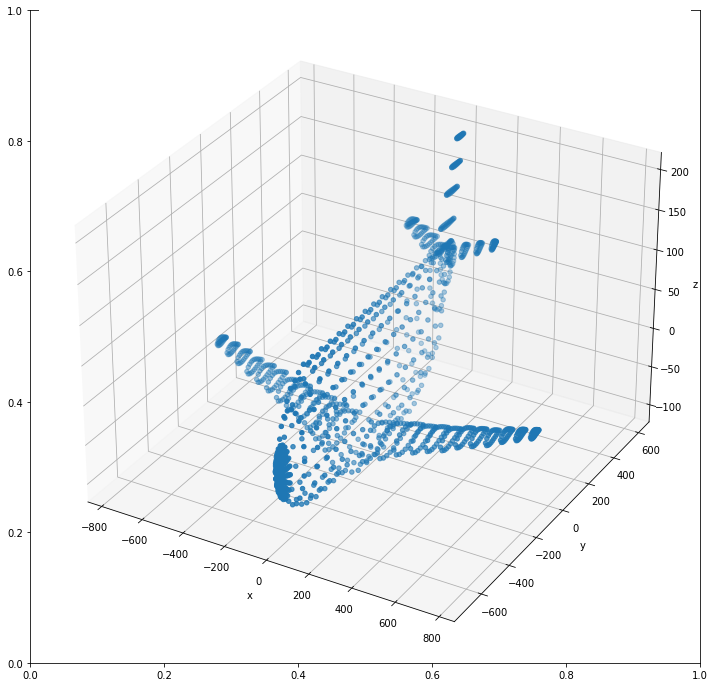

In [18]:
fig, ax =plt.subplots(figsize=(12,12))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(points[0,:],points[1,:],points[2,:])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

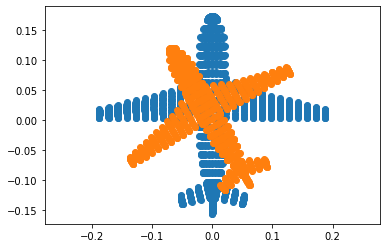

In [19]:
ones=np.ones((1,points.shape[1]))
X=np.concatenate((points,ones),axis=0)

R=np.array([[1,0,0],[0,1,0],[0,0,1]])
K=np.array([[1,0,0],[0,1,0],[0,0,1]])
t=np.array([[0],[0],[-4000]])
p1=K @ np.concatenate((R,t),axis=1)


theta = 30*np.pi/180

R=np.array([[np.cos(theta),-np.sin(theta),0],[np.sin(theta),np.cos(theta),0],[0,0,1]])
K=np.array([[0.8,0,0],[0,0.8,0],[0,0,1]])
t=np.array([[0],[0],[-4000]])
p2=K @ np.concatenate((R,t),axis=1)



X1 =p1 @ X
X2 =p2 @ X
X1=X1/X1[2,:]
X2=X2/X2[2,:]
fig, ax =plt.subplots(1,1,sharex=True,sharey=True)
ax.scatter(X1[0,:],X1[1,:])
ax.scatter(X2[0,:],X2[1,:])
ax.axis('equal')
plt.show()

item 1 area in pixels= 59143
item 1 area in pixels= 2318.642172
item 2 area in pixels= 59211
item 2 area in pixels= 2321.3080440000003


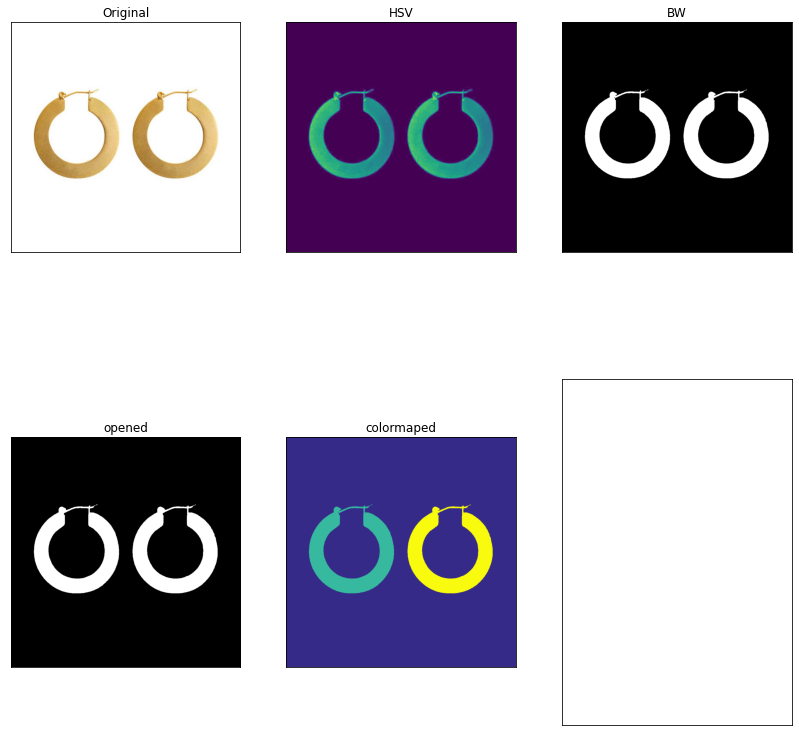

In [20]:
# Question 3
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

im=cv.imread(r'./Images/earrings.jpg',cv.IMREAD_COLOR)
assert im is not None

hsv=cv.cvtColor(im,cv.COLOR_BGR2HSV)
th,bw=cv.threshold(hsv[:,:,1],0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

w=5
kernel=np.ones((w,w),np.uint8)
opened=cv.morphologyEx(bw,cv.MORPH_CLOSE,kernel)

retval,labels,stats,centroids=cv.connectedComponentsWithStats(bw)
colormaped=cv.applyColorMap((labels/np.amax(labels)*255).astype('uint8'),cv.COLORMAP_PARULA)

z=720
f=8
for i,s in enumerate(stats):
  if i !=0:
    print("item",i,'area in pixels=',s[4] )
    print("item",i,'area in pixels=',s[4]*(2.2e-3)**2*(z**2)/(f*f))



fig,ax = plt.subplots(2,3,figsize=(14,14))
ax[0,0].imshow(cv.cvtColor(im,cv.COLOR_BGR2RGB))
ax[0,0].set_title('Original')
ax[0,0].set_xticks([]),ax[0,0].set_yticks([])

ax[0,1].imshow(hsv[:,:,1])
ax[0,1].set_title('HSV')
ax[0,1].set_xticks([]),ax[0,1].set_yticks([])

ax[0,2].imshow(bw,cmap='gray')
ax[0,2].set_title('BW')
ax[0,2].set_xticks([]),ax[0,2].set_yticks([])

ax[1,0].imshow(cv.cvtColor(opened,cv.COLOR_BGR2RGB))
ax[1,0].set_title('opened')
ax[1,0].set_xticks([]),ax[1,0].set_yticks([])

ax[1,1].imshow(cv.cvtColor(colormaped,cv.COLOR_BGR2RGB))
ax[1,1].set_title('colormaped')
ax[1,1].set_xticks([]),ax[1,1].set_yticks([])

ax[1,2].set_xticks([]),ax[1,2].set_yticks([])

plt.show()

In [21]:
# # Question 4

# import cv2 as cv
# import numpy as np
# import matplotlib . pyplot as plt
# file_name = './Images/allenkeys.jpg'
# im = cv . imread(file_name , cv .IMREAD_REDUCED_GRAYSCALE_2)
# canny = cv .Canny(im, 50, 150)

# # Copy edges to the images that will display the results in BGR
# canny_color = cv . cvtColor ( canny , cv .COLOR_GRAY2BGR)


# lines = cv . HoughLines ( canny , 1 , np . pi / 180 , 170 , None , 0 , 0)
# if lines is not None :
#     for i in range (0 , len (lines)):
#         rho = lines[i][0][0]
#         theta = lines[i][0][1]
#         a = np.cos(theta)
#         b = np.sin(theta )
#         x0 = a*rho
#         y0 = b*rho
#         pt1 = (int(x0 + 1000*(-b)) , int(y0 + 1000*(a)))
#         pt2 = (int(x0 - 1000*(-b)) , int(y0 - 1000*(a)))
#         cv.line(canny_color , pt1 , pt2 , (0 ,0 ,255) , 1 , cv.LINE_AA)

# cv.namedWindow( 'Image' , cv.WINDOW_AUTOSIZE)
# cv.imshow( 'Image' , im)
# cv.waitKey(0)
# cv.imshow( 'Image' , canny )
# cv.waitKey(0)
# cv.imshow('Image' , canny_color )
# r = cv.selectROI('Image' , canny_color , showCrosshair = True , fromCenter =False)
# cv.waitKey(0)
# print (r)
# x0 , y0 = int (r[0] +r[2]/2) , int(r[1]+r[3]/2)
# m = b/a # Gradient
# m = np.tan(np.median(lines[ : , 0 ,1]))
# c = y0 = m*x0 # Inte r cept
# cv.line(canny_color , (0 , int(c)) , (im.shape[0] , int(m*im.shape[0] +  c )) , (0 ,255 ,0) , 2 , cv.LINE_AA)
# cv.imshow('Image' , canny_color )
# cv.waitKey(0)
# cv.destroyAllWindows()
# dy = 1
# y_sub_pixel = np.arange(0 , im.shape[0] - 1 , dy )
# f_sub_pixel = np.zeros_like(y_sub_pixel)
# f_sub_pixel_nn = np.zeros_like(y_sub_pixel)
# # https : / / youtu . be / v9CFu4r6tPY
# # for i , y in enumerate(y_sub_pixel):
# # # Your code hear to generate the pix el values along the lin e
# fig , ax = plt.subplots(figsize =(30 ,5))
# ax.plot(f_sub_pixel_nn )
# #Your code hear to compute the widths . Keep in mind of the angle.